<a href="https://colab.research.google.com/github/RMDircio/DS-Unit-1-Sprint-2-Statistics/blob/master/DS_18_121_t_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Data Science Unit 1 Sprint 2 Module 1*

# T-tests (Inferential Statistics)

## Learning Objectives
- Student can explain the purpose of and be able to identify opportunities and applications for t-tests
- Student can set up and run a one-sample t test on a sample
- Student can set up and run a two-sample t test comparing two samples
- Student can use a p-value to draw the correct conclusion about the null and alternative hypothesis and give a written conclusion

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [ ]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [ ]:
# How can we quickly look at some descriptive statistics of the above dataframe?

df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       5 non-null      int64
 1   b       5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


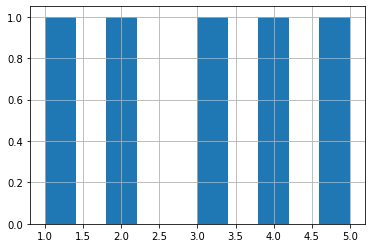

In [ ]:
import matplotlib.pyplot as plt

df['a'].hist()
plt.show()

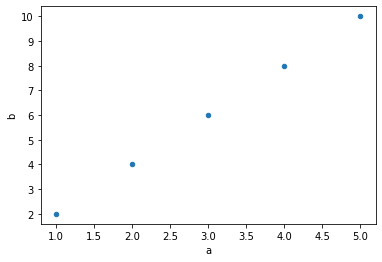

In [ ]:
df.plot.scatter('a', 'b')
plt.show()

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

![Statistical Inference](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

## Hypothesis Testing (T-Tests)

Drawing conclusions based on probability in the face of randomness



Is the sample reflective of our concept of the population?

In [ ]:
import numpy as np

In [ ]:
# Coinflips example - What is the population?

coinflips = np.random.binomial(n=1, p=.5, size=10)

coinflips

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
# dir(np.random)

If we repeat the sampling why does our estimate of the mean move around so much? 

In [ ]:
# Coinflips example - See the implications of randomness
coinflips = np.random.binomial(n=1, p=.5, size=10)

coinflips.mean()

0.4

What happens as I increase the sample size? The sample mean deviates less from the...?

In [ ]:
# More Information -> Greater Confidence in the face of randomness
coinflips = np.random.binomial(n=1, p=.5, size=100)

coinflips.mean()

0.54

In [ ]:
# More Information -> Greater Confidence in the face of randomness
coinflips = np.random.binomial(n=1, p=.5, size=10000)

coinflips.mean()

0.4985

In [ ]:
# More Information -> Greater Confidence in the face of randomness
coinflips = np.random.binomial(n=1, p=.5, size=1000000)

coinflips.mean()

0.500764

![Standard Error of the Sample  Mean](https://jungminded.weebly.com/uploads/1/3/5/8/13582285/7285766_orig.jpeg?160)

**Conclusion: As our sample size goes up, our estimates (of the mean in this case) get more precise, allowing us to infer things about the population with greater confidence.**



## One Sample T-test

What if I didn't have a fair coin?

Comparing information from a sample against our concept of the population.

![One Sample T Statistic](https://www.statisticshowto.com/wp-content/uploads/2015/09/t-score.jpg)

$\overline{x}$ = Sample Mean (statistic)

$\mu$ = Population Mean (concept of the population) (parameter)

$s$ = Sample standard deviation

$n$ = Sample Size

## The T-test Process:

Is this a fair coin?

Does the sample match my concept of the population?

Our concept of the population initially is that it's a fair coin.

There's more fair coins in the world than unfair coins so initially we'll go into this thinking that it's probably a fair coin.

In [ ]:
coinflips = np.random.binomial(n=1, p=.6, size=20)

coinflips

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
coinflips.mean()

0.6

### 1) Null Hypothesis

The hypothesis that we might "nullify"

$H_0: \overline{x} == \mu$

My sample mean is equal to my concept of the population

This is a fair coin

### 2) Alternative Hypothesis (opposite of the null hypothesis)

$H_a: \overline{x} \neq \mu$

This is an unfair coin

### 3) Confidence Level: 

Confidence Level: 95%

I need to be 95% certain that the alternative hypothesis is true, before I will reject the null hypothesis.

In [ ]:
# Lets use a tool called a t-test to test if this is a fair coin or not
from scipy import stats

# Pass to this function our sample, and our concept of the population parameter (population mean)
stats.ttest_1samp(coinflips, .5)

# The output of this function is our t-statistic, and p-value
# The p-value tells us how confident we are in our null hypothesis.

Ttest_1sampResult(statistic=0.8897565210026089, pvalue=0.3847242304314523)

# THE P-VALUE ALWAYS REFERS TO THE NULL HYPOTHESIS

p-value: The likelihood of the null hypothesis being true, given the data that we have collected (in light of our sample).

In order for us to reject the null hypothesis (and by extension suggest that the alternative is likely to be true) our p-value must be < .05

In other words

P-value < (1-Confidence_Level)

### 4) Conclusion: 

Based on a t-statistic of .889, and a p-value of .384, (reject/**fail to reject**) the null hypothesis that this is a fair coin.

## Use a large sample size

In [ ]:
coinflips = np.random.binomial(n=1, p=.6, size=200)

coinflips.mean()

0.575

1) Null Hypothesis:

Fair Coin: $\overline{x} == \mu$


2) Alternative Hypothesis:

Unfair Coin: $ \overline{x} \neq \mu$

3) Confidence Level: 95%

In [ ]:
stats.ttest_1samp(coinflips, .5)

Ttest_1sampResult(statistic=2.1402249087062186, pvalue=0.033553785885695776)

4) Conclusion: 

Based on a t-statistic of 14.98 and a p-value of .03 I (**reject**/fail to reject) the null hypothesis that this is a fair coin, and suggest the alternative that it is an unfair coin.


**The larger the sample size, the better I will be able to detect small yet significant differences between our sample and population values.**

### 1-sample t-tests (You get to choose what your concept of the population is)

1) Null Hypothesis: 

The coin's probability of heads was .6


In [ ]:
stats.ttest_1samp(coinflips, .6)

Ttest_1sampResult(statistic=-0.7134083029020739, pvalue=0.47642893642254447)

## Two Sample T-test

Comparing two groups or samples against each other rather than a single sample against a population. 



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



In [ ]:
# Simulate pancake cooking times according to the conditions described above
# We're generating fake data to test these hypotheses.

# Generate a fake dataset

xbar1 = 180
s1 = 5

xbar2 = 178.5
s2 = 4.25

sample1 = np.random.normal(xbar1, s1, 1000)
sample2 = np.random.normal(xbar2, s2, 800)

1) Null Hypothesis:

$H_0: \overline{x}_1 == \overline{x}_2$

The pancakes cook at the same rate on both burners of the stove

2) Alternative Hypothesis:

$H_a: \overline{x}_1 \neq \overline{x}_2$

The pancakes cook at different rates on both burners of the stove

3) Confidence Level: 95%

In [ ]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=8.796556091775207, pvalue=3.2364715576407102e-18)

4) Conclusion:

Based on a t-statistic of 7.8 and a p-value of ~0 (**reject**/fail to reject) the null hypothesis that pancakes cooked on the two burners cook at the same rate, and suggest the alternative, that they cook at different rates.

## Lets Practice more 1-sample and 2-sample T-tests

Using the dataset that you will be using on your assignment

In [ ]:
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-07-13 17:49:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-07-13 17:49:20 (128 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [ ]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers, na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


## Categorical Encoding

Represent categories with specific integers

'y': 1

'n': 0

In [ ]:
df = df.replace({'y': 1, 'n': 0})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [ ]:
# Compare republicans to democrats

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [ ]:
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [ ]:
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [ ]:
dem['handicapped-infants'].mean()

0.6046511627906976

In [ ]:
rep['handicapped-infants'].mean()

0.18787878787878787

1) Null Hypothesis:

Democrats support this bill at the same level that republicans do.

$H_0: \overline{x}_r == \overline{x}_d$

2) Alternative Hypothesis:

Democrats support this bill in a different proportion than republicans.

$H_a: \overline{x}_r \neq \overline{x}_d$

3) Confidence Level: 99%

In [ ]:
dems_sample = dem['handicapped-infants'].dropna()
reps_sample = rep['handicapped-infants'].dropna()

In [ ]:
stats.ttest_ind(rep['handicapped-infants'], dem['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)

4) Conclusion:

Due to a t-statistic of 9.2 and a p-value of ~0 we **reject** the null hypothesis that democrats and repulicans support the handicapped-infants bill at the same rate, and suggest the alternative that there are differing levels of support for this bill between the two parties.

Which party supports this bill at the higher rate?

In [ ]:
dem['handicapped-infants'].mean()

0.6046511627906976

In [ ]:
rep['handicapped-infants'].mean()

0.18787878787878787

The sign of the t-statistic tells us which sample mean is greater.

positive t-statistic: left-hand sample mean is greater

negative t-statistic: right-hand sample mean is greater


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [ ]:
# How does all of congress view an issue
# house of representatives == population

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
# Take a smaller sample of congress for my sample

# Random State set for reproducibility
sample = df.sample(20, random_state=30)

sample

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
276,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
341,democrat,0.0,NaN,1.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0
346,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
328,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
142,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
384,democrat,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
157,democrat,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
415,democrat,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
197,republican,0.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
378,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means